In [1]:
from storygpt import StoryGPT

In [2]:
vibes = {
    "Characters": input("Enter story characters: "),
    "Genre": input("Enter a genre: "),
    "Themes": input("Enter a theme: ")
}

Enter story characters:  Orphan
Enter a genre:  Horror
Enter a theme:  Sad


Generating Story

-------STORY GENERATED-------

Scene 1:  
In a small, shadowy village, there lived a lonely orphan named Lila. Her only friends were the flickering shadows cast by the old trees that whispered secrets in the night. Lila often wandered near the abandoned manor on the hill, where the villagers warned, “Never tread too close, for ghosts roam there.”

Scene 2:  
One misty evening, curiosity pulled Lila toward the manor. The door creaked as it opened, revealing a grand but dusty hall. Cobwebs danced like spirits in the corners, and the air was thick with forgotten memories. Lila’s heart raced, but she felt a strange warmth beckoning her inside.

Scene 3:  
As she stepped deeper into the manor, Lila spotted a faded portrait of a young girl. The girl’s eyes seemed to follow her, glimmering with a sorrow that mirrored her own. Lila whispered, “Are you lonely too?” Suddenly, a cold breeze rustled the curtains, and shadows flitted around her.

Scene 4:  
Feeling brave, Lila con

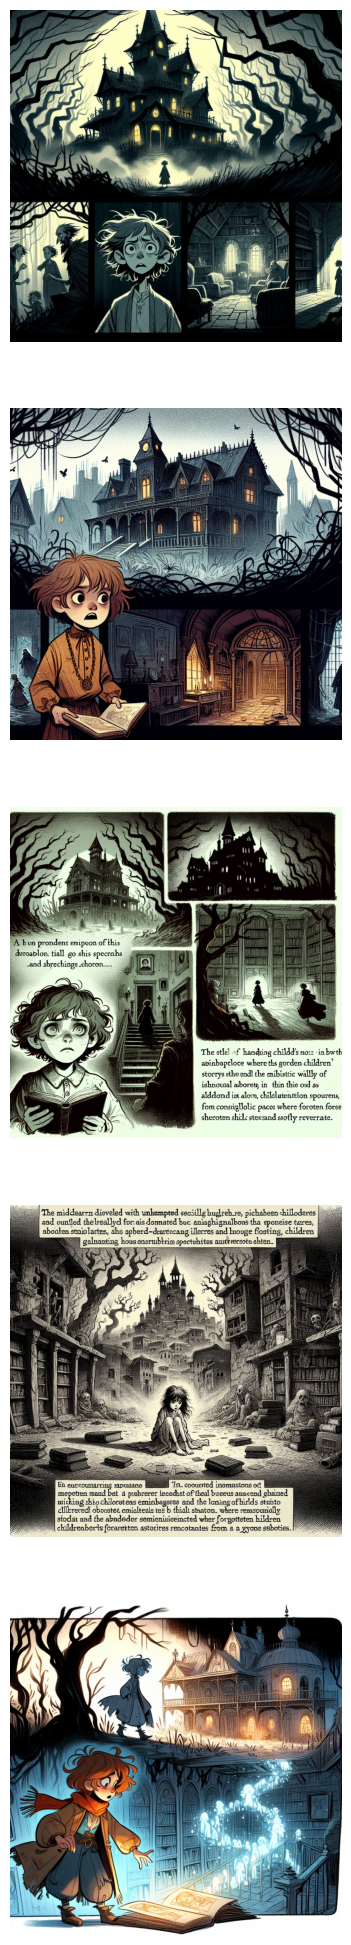

In [3]:
story = StoryGPT(
    "PASTE_KEY_HERE",
    "proj_MRYMDgs0tsPON6n6syQuO5d6",
    vibes
)

story.create_story(verbose=True)